In [1]:

import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

def set_korean_font():
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
    os_name = platform.system()

    if os_name == 'Linux':
        # 우분투용 폰트 설정
        path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'
        font_name = font_manager.FontProperties(fname=path, size=12).get_name()
        rc('font', family=font_name)
        print("Linux (Ubuntu) 환경에서 한글 폰트 설정 완료!")
    elif os_name == 'Darwin':
        # macOS용 폰트 설정
        rc('font', family='AppleGothic')
        print("macOS 환경에서 한글 폰트 설정 완료!")
    elif os_name == 'Windows':
        # 윈도우용 폰트 설정
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
        print("Windows 환경에서 한글 폰트 설정 완료!")
    else:
        print(f"{os_name}는 지원되지 않는 운영체제입니다.")

# 한글 폰트 설정 실행
set_korean_font()

macOS 환경에서 한글 폰트 설정 완료!


In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv('/Users/jeong-yula/Downloads/open/train.csv')

In [7]:
def class_encoder(x):
    if x=='A':
        return 6
    elif x=='B':
        return 5
    elif x=='C':
        return 4
    elif x=='D':
        return 3
    elif x=='E':
        return 2
    elif x=='F':
        return 1
    else:
        return 0

df['대출등급']=df['대출등급'].apply(class_encoder)

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le= LabelEncoder()
oe=OneHotEncoder()

In [11]:
oe=OneHotEncoder()

In [12]:
oe.fit(df[['대출목적']])

OneHotEncoder()

In [13]:
oe.transform(df[['대출목적']])

<96294x12 sparse matrix of type '<class 'numpy.float64'>'
	with 96294 stored elements in Compressed Sparse Row format>

In [14]:
purpose_csr=oe.transform(df[['대출목적']])
purpose_csr_df=pd.DataFrame(purpose_csr.toarray(), columns=oe.get_feature_names_out())
purpose_csr_df.head()

,대출목적_기타,대출목적_부채 통합,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
df=pd.concat([df,purpose_csr_df],axis=1)

대출목적 간 상관관계

In [17]:
corr_df=df[['대출목적_기타','대출목적_부채 통합','대출목적_소규모 사업','대출목적_신용 카드','대출목적_의료','대출목적_이사','대출목적_자동차','대출목적_재생 에너지','대출목적_주택','대출목적_주택 개선','대출목적_휴가']]
corr_matrix=corr_df.corr()
corr_matrix

,대출목적_기타,대출목적_부채 통합,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주택,대출목적_주택 개선,대출목적_휴가
대출목적_기타,1.000000,-0.262994,-0.020620,-0.132698,-0.023724,-0.016510,-0.020752,-0.005672,-0.012720,-0.059384,-0.015841
대출목적_부채 통합,-0.262994,1.000000,-0.105097,-0.676330,-0.120916,-0.084147,-0.105768,-0.028909,-0.064831,-0.302667,-0.080736
대출목적_소규모 사업,-0.020620,-0.105097,1.000000,-0.053028,-0.009481,-0.006598,-0.008293,-0.002267,-0.005083,-0.023731,-0.006330
대출목적_신용 카드,-0.132698,-0.676330,-0.053028,1.000000,-0.061010,-0.042458,-0.053367,-0.014586,-0.032712,-0.152716,-0.040737
대출목적_의료,-0.023724,-0.120916,-0.009481,-0.061010,1.000000,-0.007591,-0.009541,-0.002608,-0.005848,-0.027303,-0.007283
대출목적_이사,-0.016510,-0.084147,-0.006598,-0.042458,-0.007591,1.000000,-0.006640,-0.001815,-0.004070,-0.019001,-0.005068
대출목적_자동차,-0.020752,-0.105768,-0.008293,-0.053367,-0.009541,-0.006640,1.000000,-0.002281,-0.005116,-0.023883,-0.006371
대출목적_재생 에너지,-0.005672,-0.028909,-0.002267,-0.014586,-0.002608,-0.001815,-0.002281,1.000000,-0.001398,-0.006528,-0.001741
대출목적_주택,-0.012720,-0.064831,-0.005083,-0.032712,-0.005848,-0.004070,-0.005116,-0.001398,1.000000,-0.014639,-0.003905
대출목적_주택 개선,-0.059384,-0.302667,-0.023731,-0.152716,-0.027303,-0.019001,-0.023883,-0.006528,-0.014639,1.000000,-0.018230


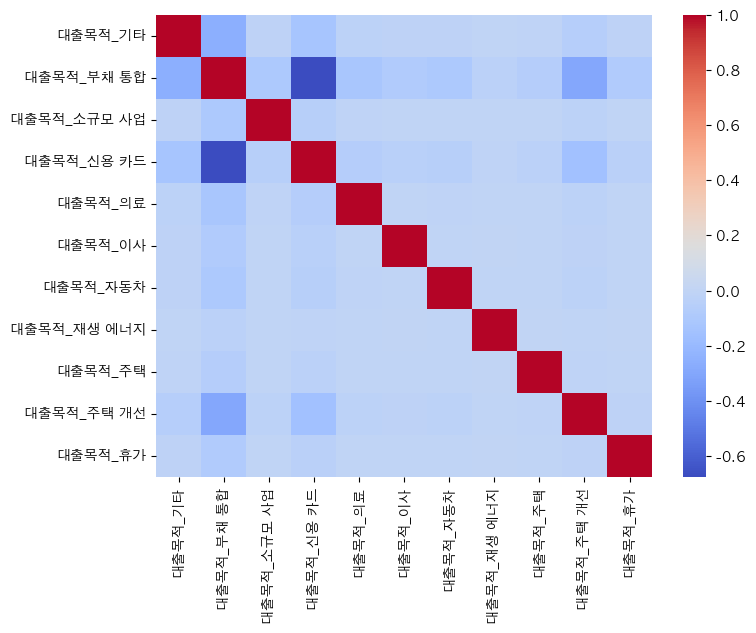

In [18]:

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap='coolwarm',fmt=".2fm")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

대출목적~대출등급 상관관계

In [19]:
corr_df=df[['대출목적_기타','대출목적_부채 통합','대출목적_소규모 사업','대출목적_신용 카드','대출목적_의료','대출목적_이사','대출목적_자동차','대출목적_재생 에너지','대출목적_주택','대출목적_주택 개선','대출목적_휴가','대출등급']]
corr_matrix=corr_df.corr()
corr_matrix

,대출목적_기타,대출목적_부채 통합,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주택,대출목적_주택 개선,대출목적_휴가,대출등급
대출목적_기타,1.000000,-0.262994,-0.020620,-0.132698,-0.023724,-0.016510,-0.020752,-0.005672,-0.012720,-0.059384,-0.015841,-0.075877
대출목적_부채 통합,-0.262994,1.000000,-0.105097,-0.676330,-0.120916,-0.084147,-0.105768,-0.028909,-0.064831,-0.302667,-0.080736,-0.116554
대출목적_소규모 사업,-0.020620,-0.105097,1.000000,-0.053028,-0.009481,-0.006598,-0.008293,-0.002267,-0.005083,-0.023731,-0.006330,-0.084009
대출목적_신용 카드,-0.132698,-0.676330,-0.053028,1.000000,-0.061010,-0.042458,-0.053367,-0.014586,-0.032712,-0.152716,-0.040737,0.199465
대출목적_의료,-0.023724,-0.120916,-0.009481,-0.061010,1.000000,-0.007591,-0.009541,-0.002608,-0.005848,-0.027303,-0.007283,-0.026155
대출목적_이사,-0.016510,-0.084147,-0.006598,-0.042458,-0.007591,1.000000,-0.006640,-0.001815,-0.004070,-0.019001,-0.005068,-0.037702
대출목적_자동차,-0.020752,-0.105768,-0.008293,-0.053367,-0.009541,-0.006640,1.000000,-0.002281,-0.005116,-0.023883,-0.006371,0.013036
대출목적_재생 에너지,-0.005672,-0.028909,-0.002267,-0.014586,-0.002608,-0.001815,-0.002281,1.000000,-0.001398,-0.006528,-0.001741,-0.020849
대출목적_주택,-0.012720,-0.064831,-0.005083,-0.032712,-0.005848,-0.004070,-0.005116,-0.001398,1.000000,-0.014639,-0.003905,-0.052788
대출목적_주택 개선,-0.059384,-0.302667,-0.023731,-0.152716,-0.027303,-0.019001,-0.023883,-0.006528,-0.014639,1.000000,-0.018230,0.013000


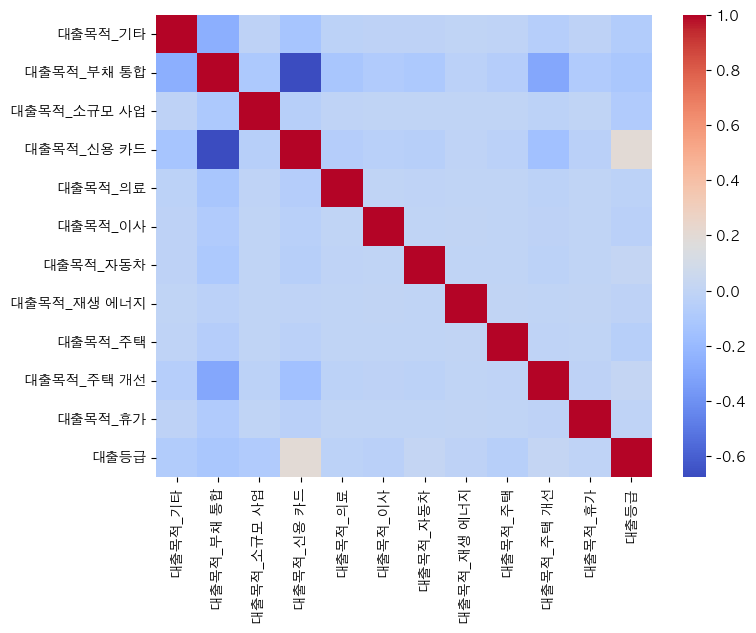

In [20]:

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap='coolwarm',fmt=".2fm")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()